## Importing libraries


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import geopandas
import plotly.express as px
import numpy
import seaborn as sns
import os

### Setting up the table and creating plots
 

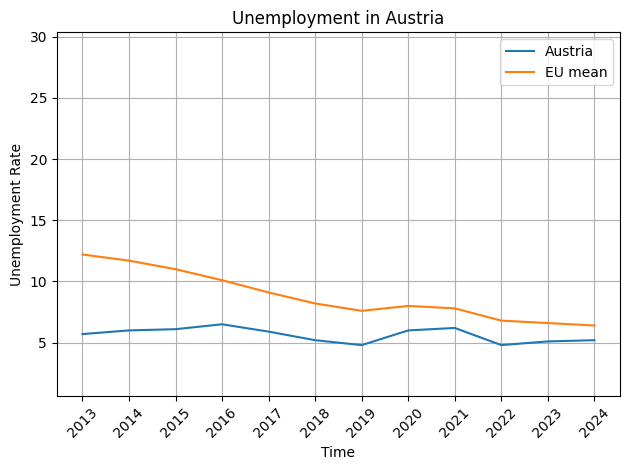

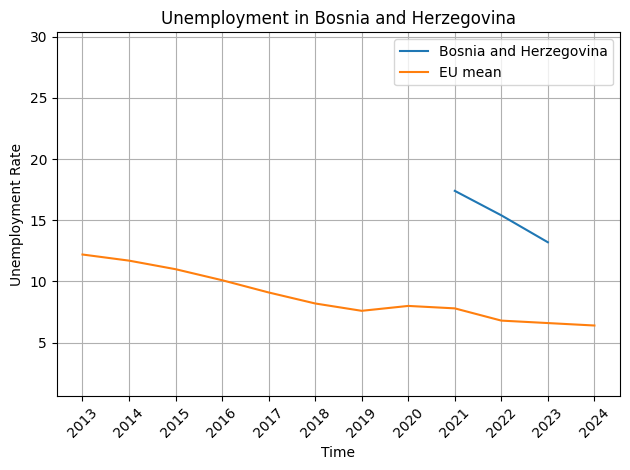

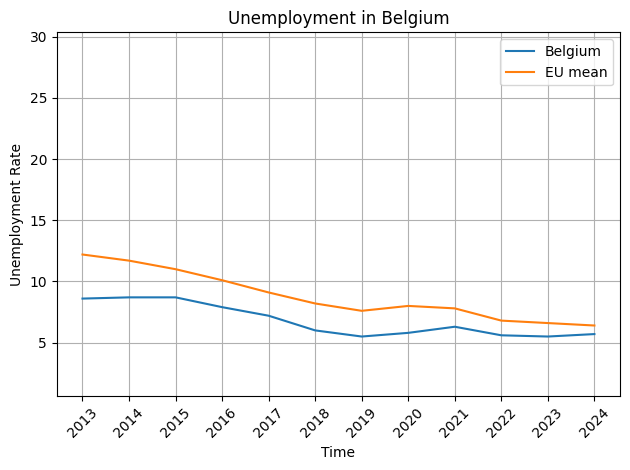

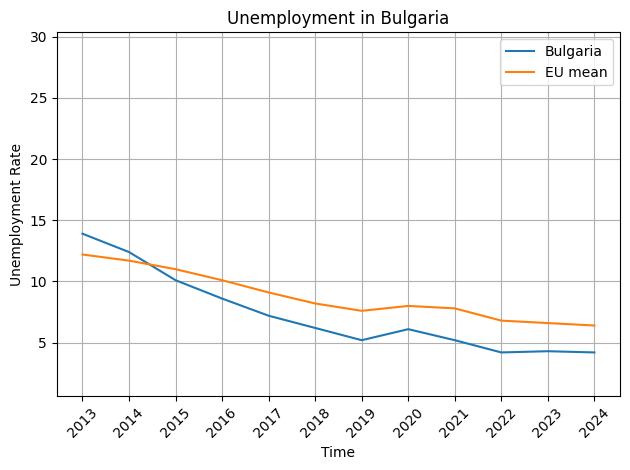

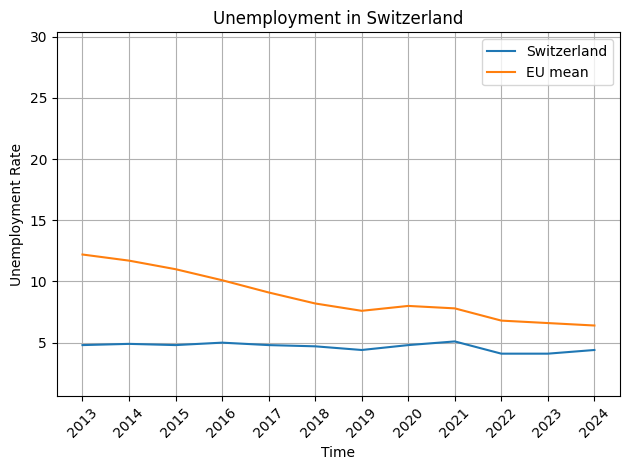

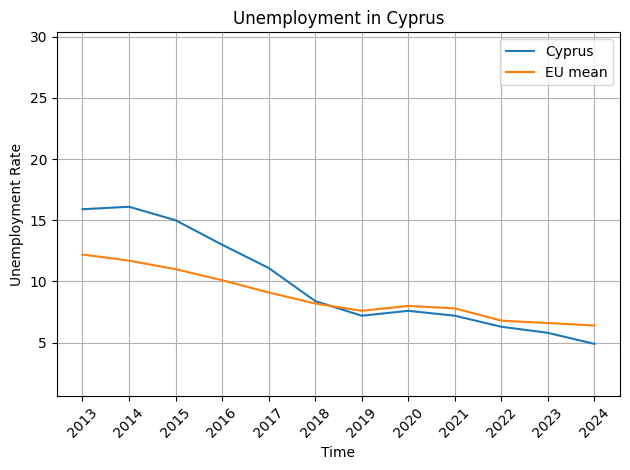

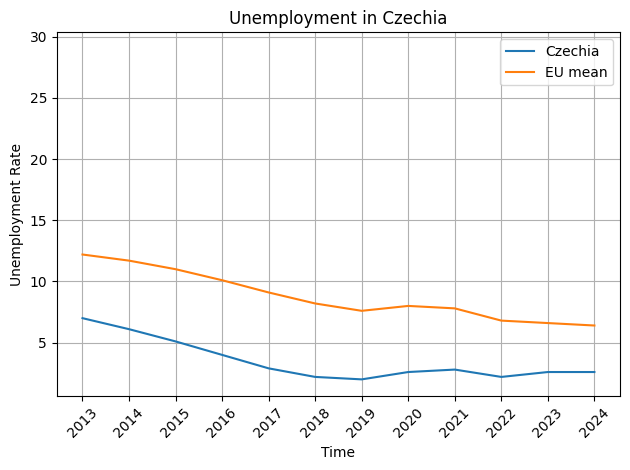

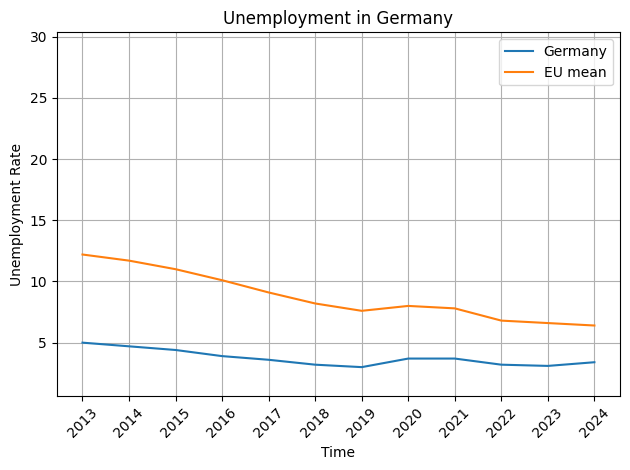

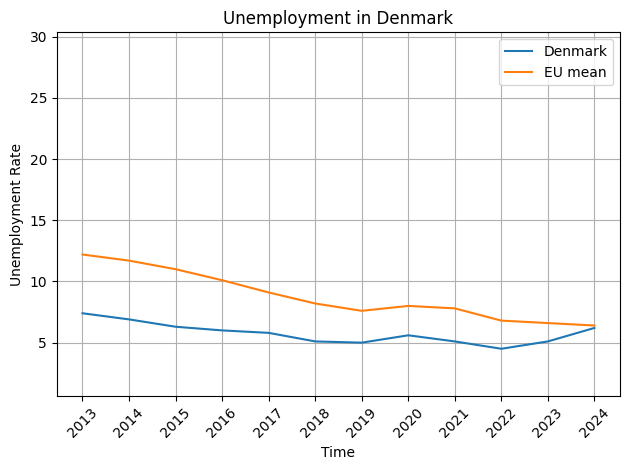

Directory not found for Euro area – 20 countries (from 2023): ..\Images\Countries\Euro area – 20 countries (from 2023)


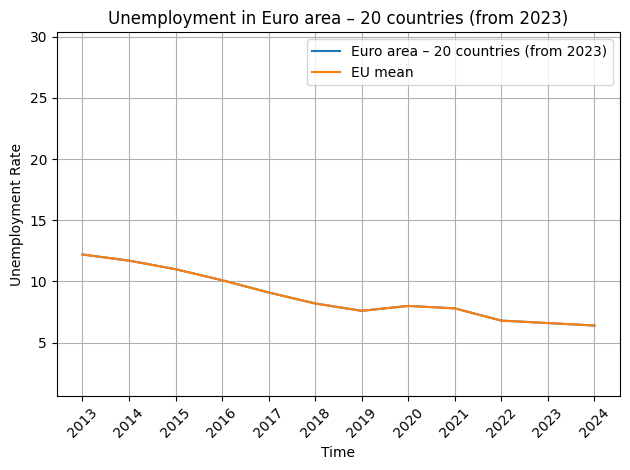

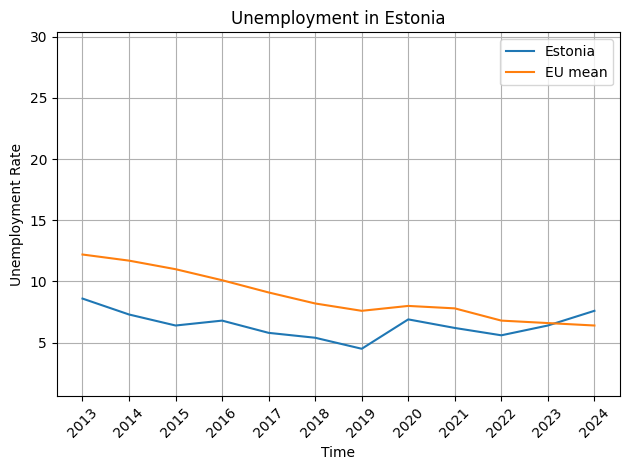

Directory not found for Greece: ..\Images\Countries\Greece


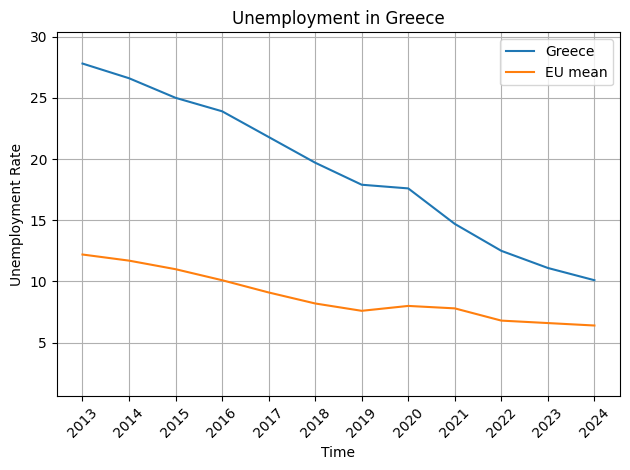

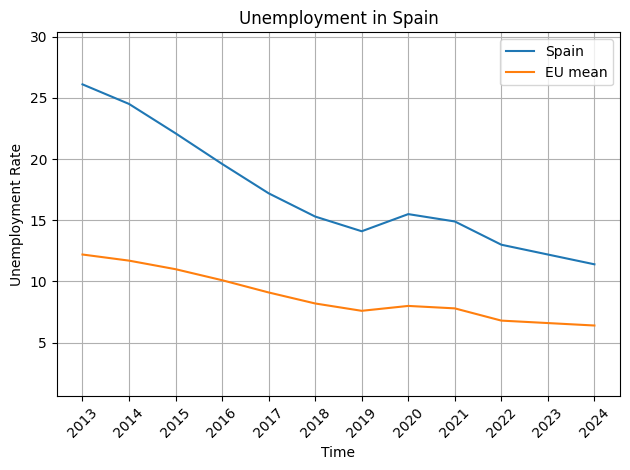

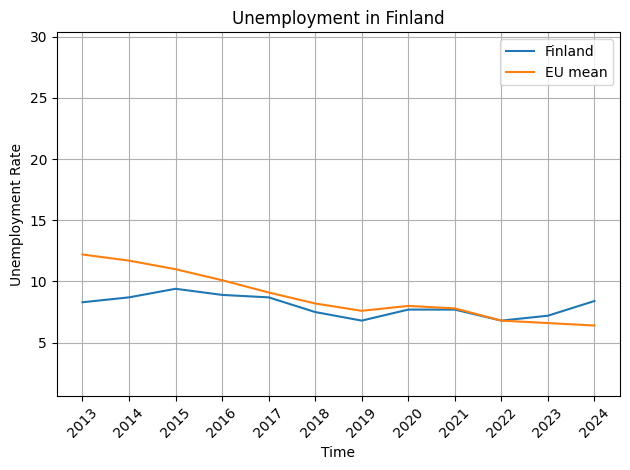

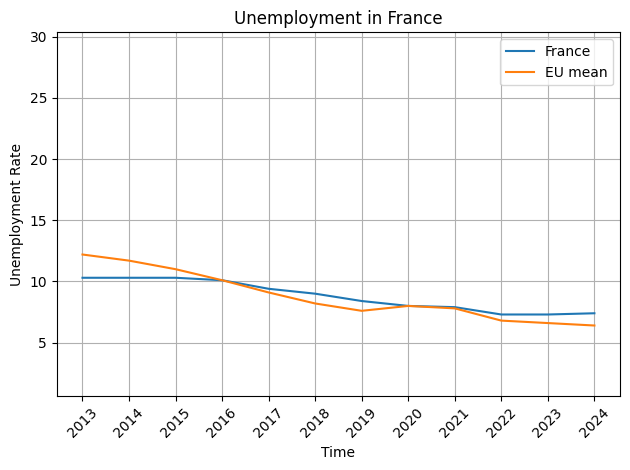

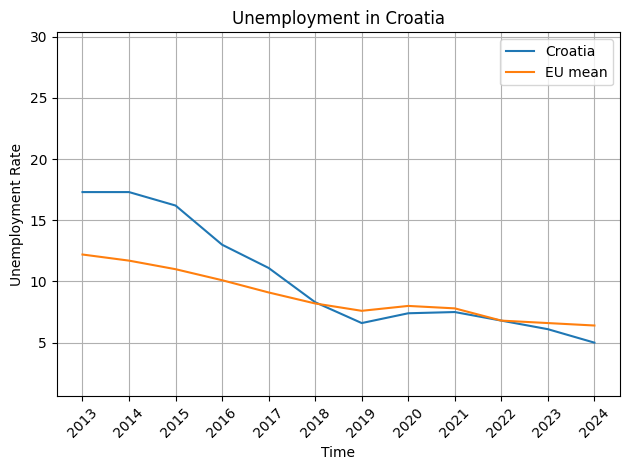

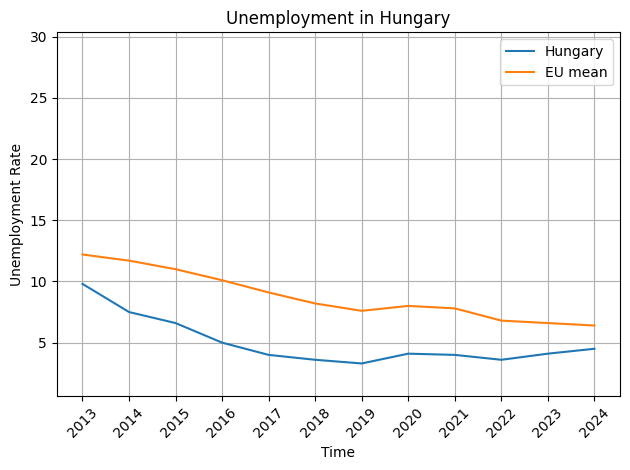

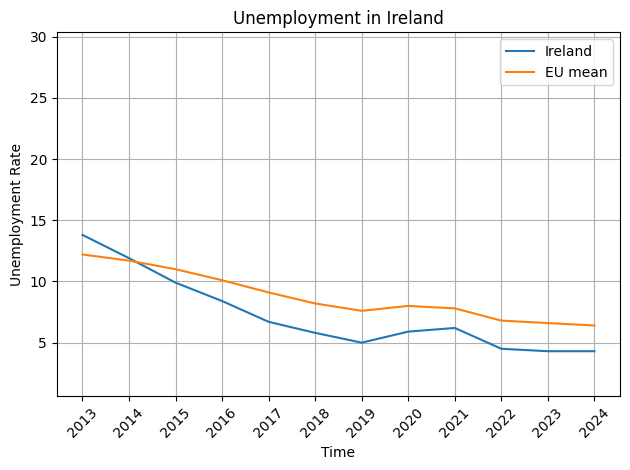

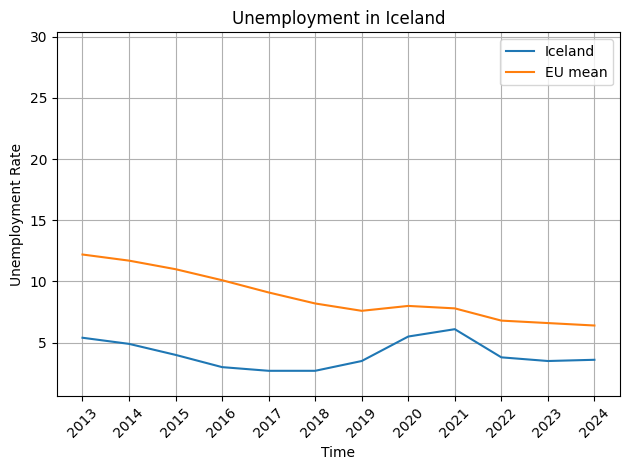

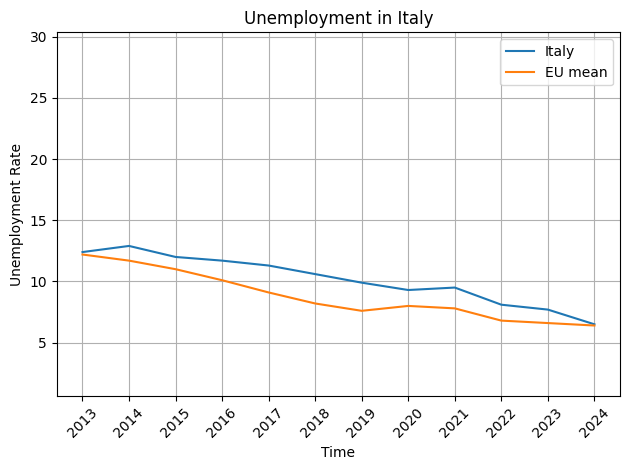

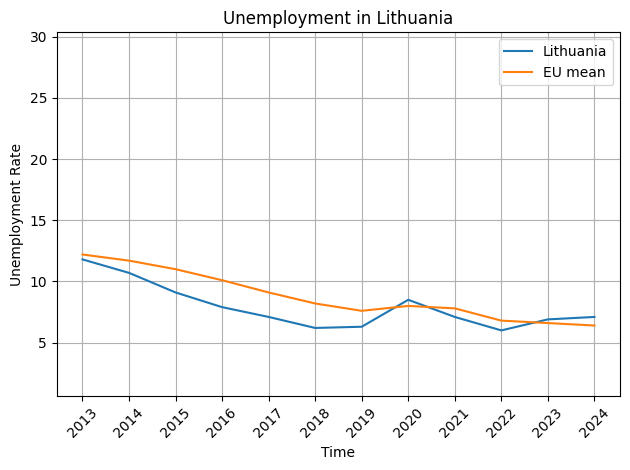

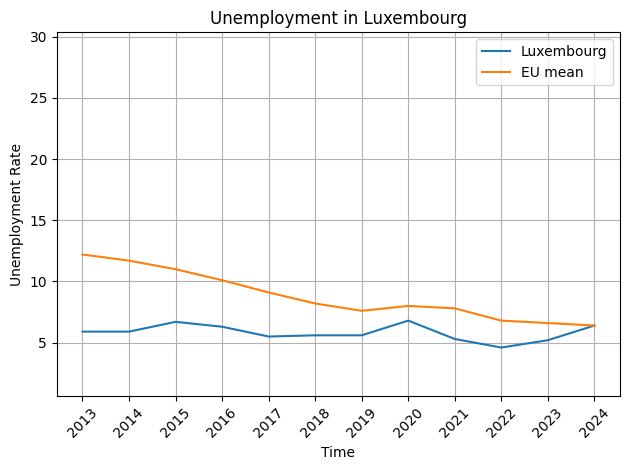

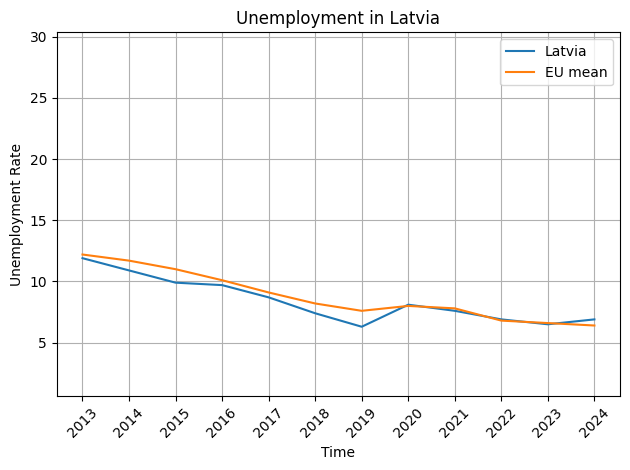

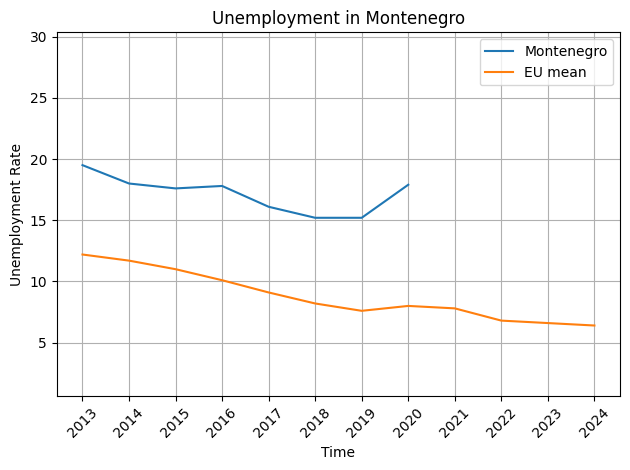

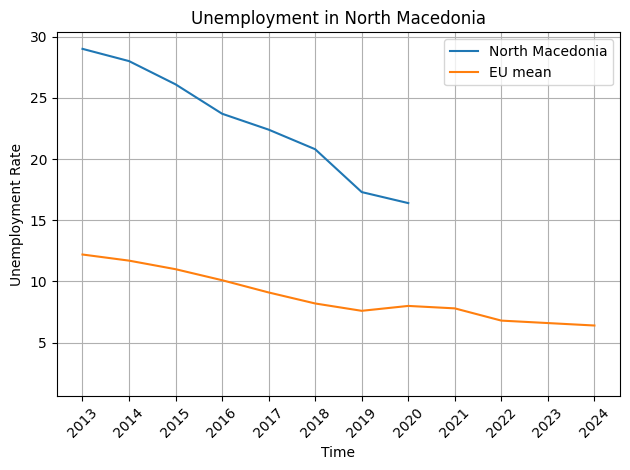

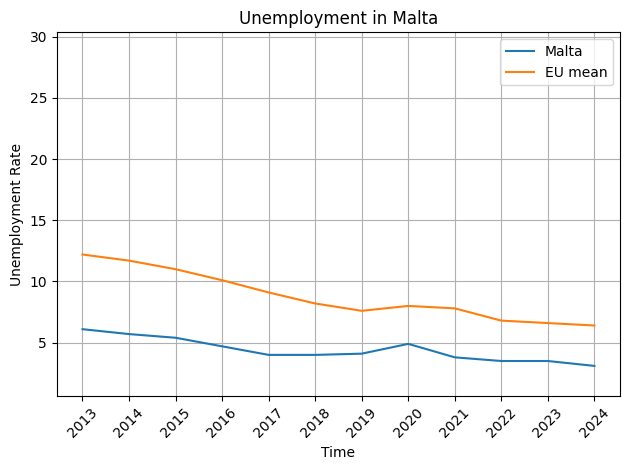

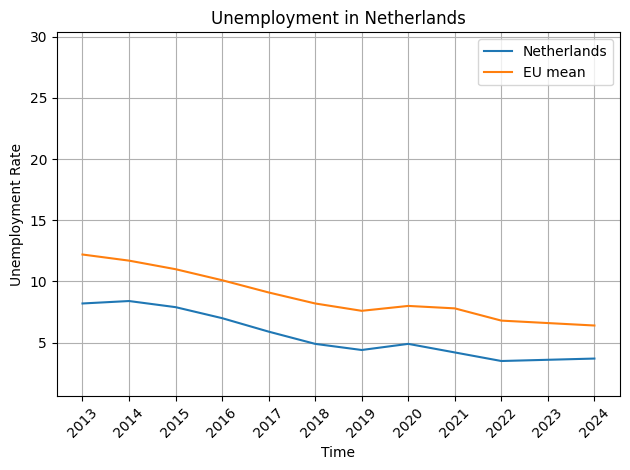

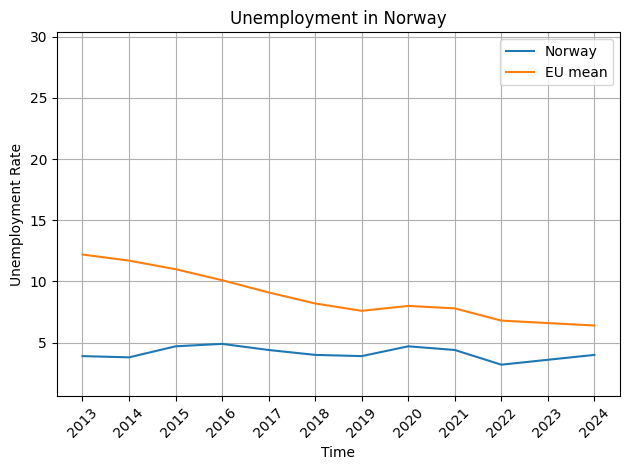

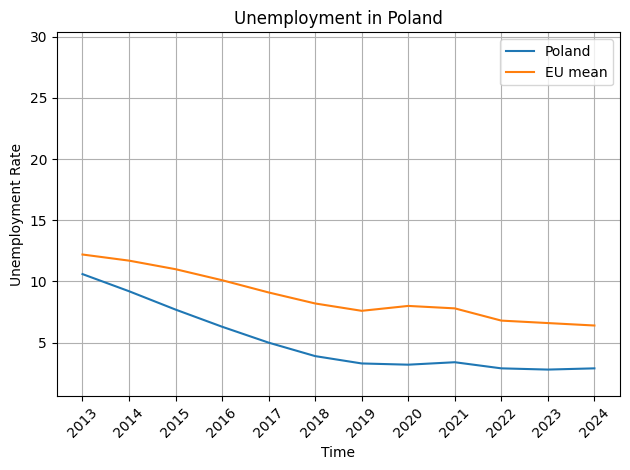

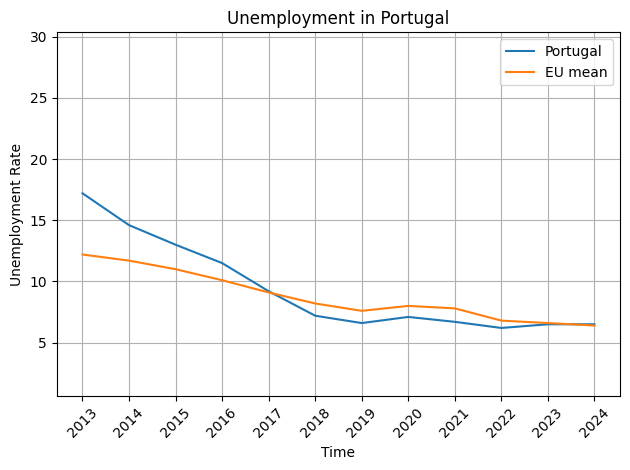

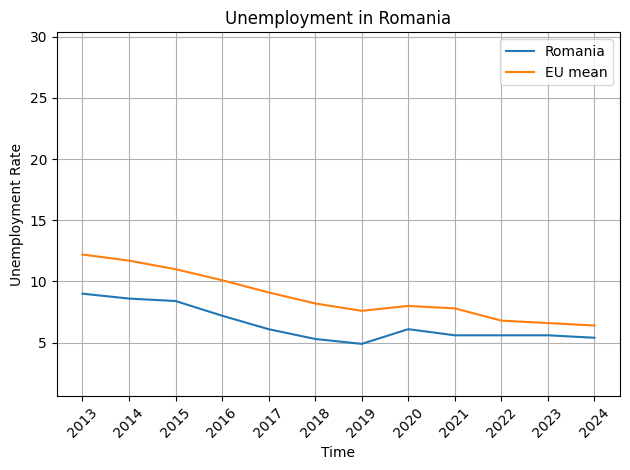

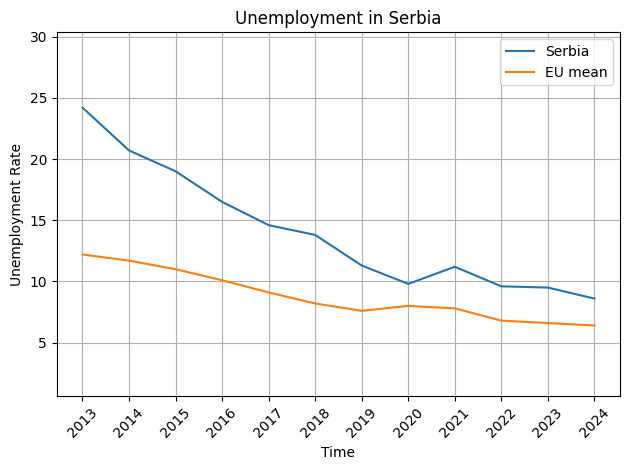

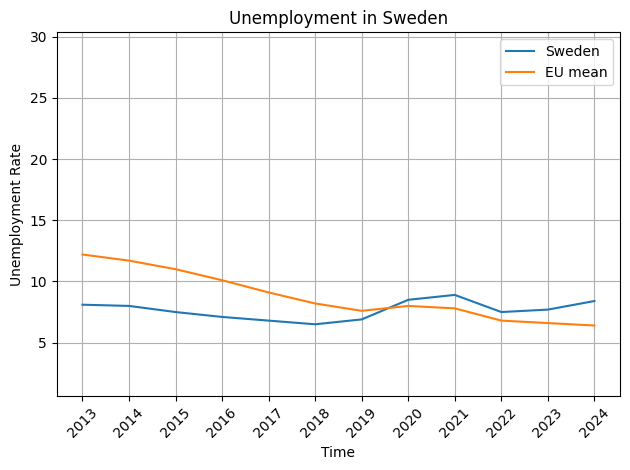

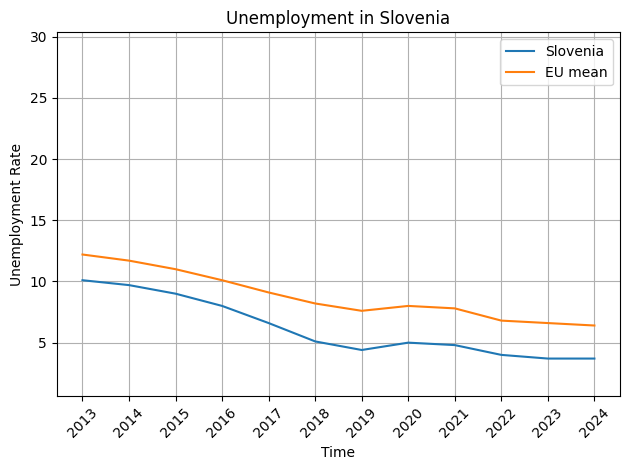

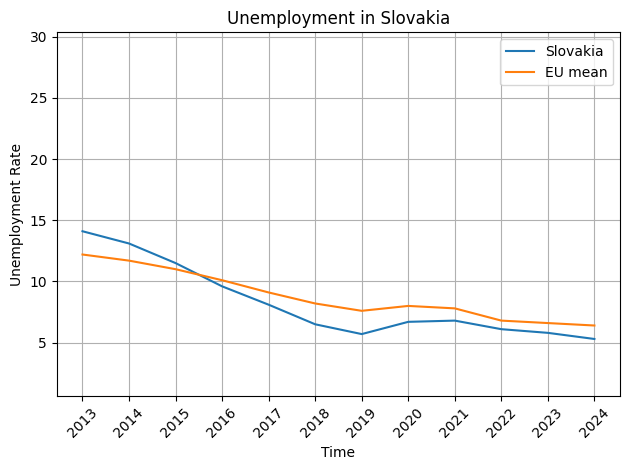

Directory not found for Türkiye: ..\Images\Countries\Türkiye


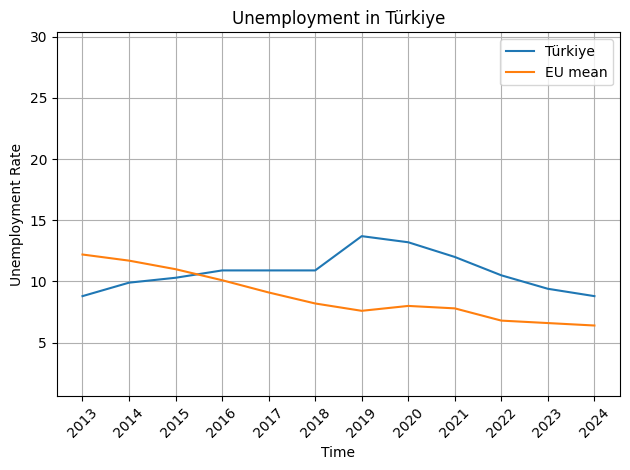

In [4]:
unemployment_table = pd.read_csv("../Data/unemployment/unemployment.csv")

states = unemployment_table["Geopolitical entity (reporting)"].unique()
y_min = unemployment_table["OBS_VALUE"].min()
y_max = unemployment_table["OBS_VALUE"].max()
padding = (y_max - y_min) * 0.05
y_min -= padding
y_max += padding
for state in states:
    country_df = unemployment_table[unemployment_table["Geopolitical entity (reporting)"] == state]
    eu_mean=unemployment_table[unemployment_table["Geopolitical entity (reporting)"] == "Euro area – 20 countries (from 2023)"]

    state_line, = plt.plot(country_df["TIME_PERIOD"], country_df["OBS_VALUE"], label=state)
    eu_line, = plt.plot(eu_mean["TIME_PERIOD"], eu_mean["OBS_VALUE"], label="EU mean")

    plt.grid()
    plt.title(f"Unemployment in {state}")
    plt.xlabel("Time")
    plt.ylabel("Unemployment Rate")
    plt.ylim(y_min, y_max)
    years = sorted(unemployment_table["TIME_PERIOD"].unique())
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.legend() 

    output_dir = os.path.join("..", "Images", "Countries", state)
    file_name = f"unemployment_change_{state}.png"
    file_path = os.path.join(output_dir, file_name)

    if os.path.isdir(output_dir):
        plt.savefig(file_path)
    else:
        print(f"Directory not found for {state}: {output_dir}")

    plt.show()
